# Red Wine Quality Prediction
This data science project aims to predict the quality of red variants of the Portuguese "Vinho Verde" wine. The dataset consists of physicochemical (input) and sensory (output) variables, with no information about grape types, wine brand, or selling price due to privacy and logistic constraints.

The dataset can be approached as either a classification or regression task. The quality scores are ordered and not evenly distributed, meaning there are significantly more normal wines than excellent or poor ones.
## Dataset Information
The dataset used in this project is sourced from the UCI Machine Learning Repository and is also available for convenience on Kaggle. However, if there are any licensing concerns, the dataset will be promptly removed upon request. Additional details can be found in the reference [Cortez et al., 2009].
## Input Variables (Physicochemical Tests)
1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol
## Output Variable (Sensory Data)
   1. Quality (score between 0 and 10)
For further insights and analysis, refer to the research paper by Cortez et al. (2009). This project aims to leverage machine learning techniques to build a predictive model that can estimate the quality of red wines based on their physicochemical properties and sensory attributes.

## Import some importent Libraries
numpy,pandas,matplotlib,seaborn

In [94]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading the dataset

In [95]:
df=pd.read_csv("winequality-red.csv")

In [96]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [97]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [98]:
# Assuming you have a dataframe df with column containg space
df.columns=df.columns.str.replace(" ","_")

In [99]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

## Data preprocessing part 1

In [100]:
# Checking Null value in my dataset
df.isnull().sum()
#df.isna().sum() #You can also use that df.isna() to check the null value in the data set

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [101]:
# Information of the dataset that is not_null and data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [102]:
df=pd.DataFrame(df)

In [103]:
df=df.apply(pd.to_numeric,errors="coerce")

In [104]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [106]:
df.shape

(1599, 12)

In [107]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [108]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [109]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [110]:
#df["quality"]=df["quality"].apply(lambda x: 1 if x>=7 else 0)
df.rename(columns={"quality":"good_quality"},inplace=True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploratory data Analysis

Text(0.5, 1.0, 'Count of good Quality vs Bad Quality Wines')

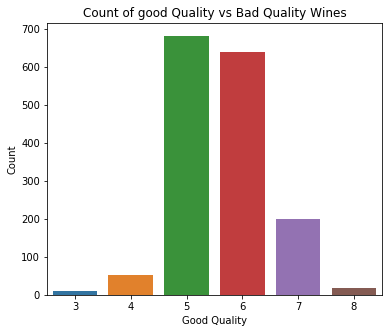

In [111]:
# count plot finding the relation of the good Quality
plt.figure(figsize=(6,5))
sns.countplot(x="good_quality",data=df)
plt.xlabel("Good Quality")
plt.ylabel("Count")
plt.title("Count of good Quality vs Bad Quality Wines")

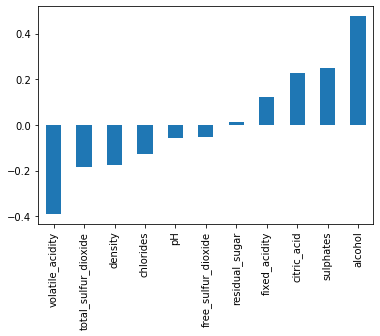

In [112]:
# to finding the correlation between the feature using feature
df.corr()["good_quality"][:-1].sort_values().plot(kind='bar')

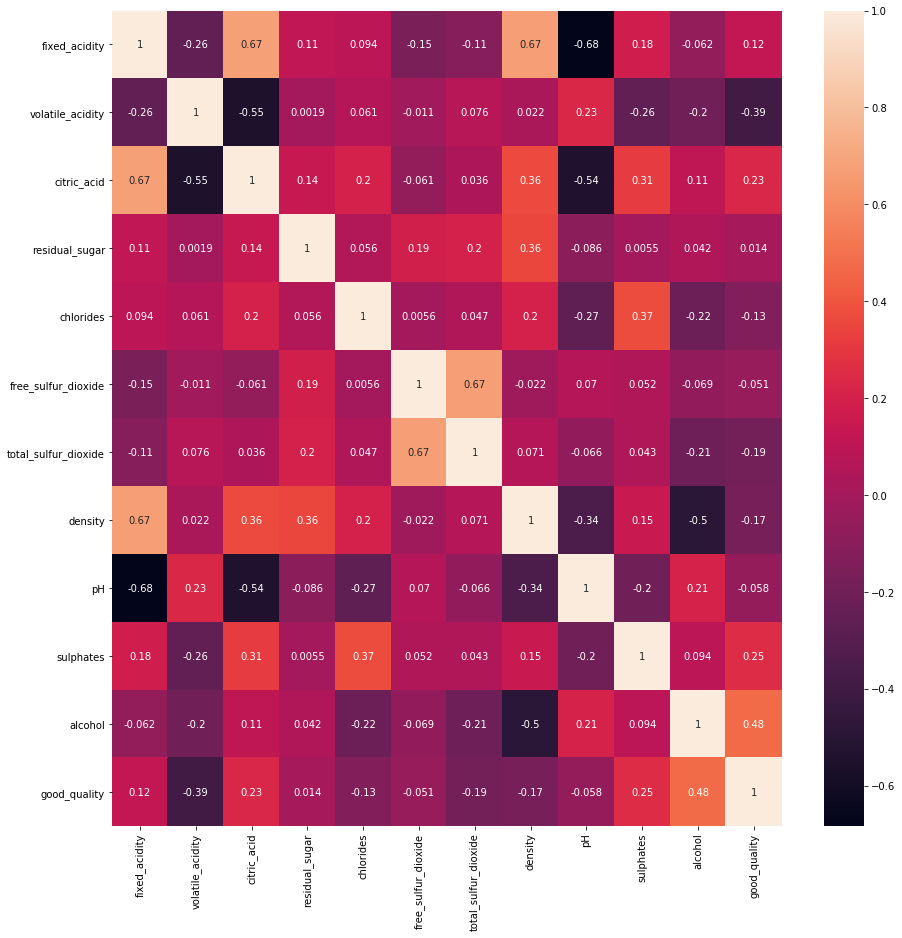

In [113]:
# Heatmap to find the correlation between the all feature 
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [114]:
df.columns


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'good_quality'],
      dtype='object')

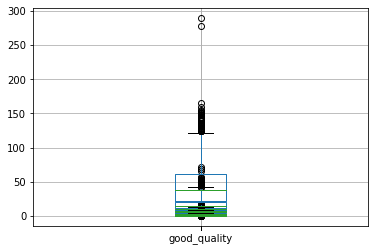

In [115]:
for i in df.columns:
    df.boxplot(column=i)

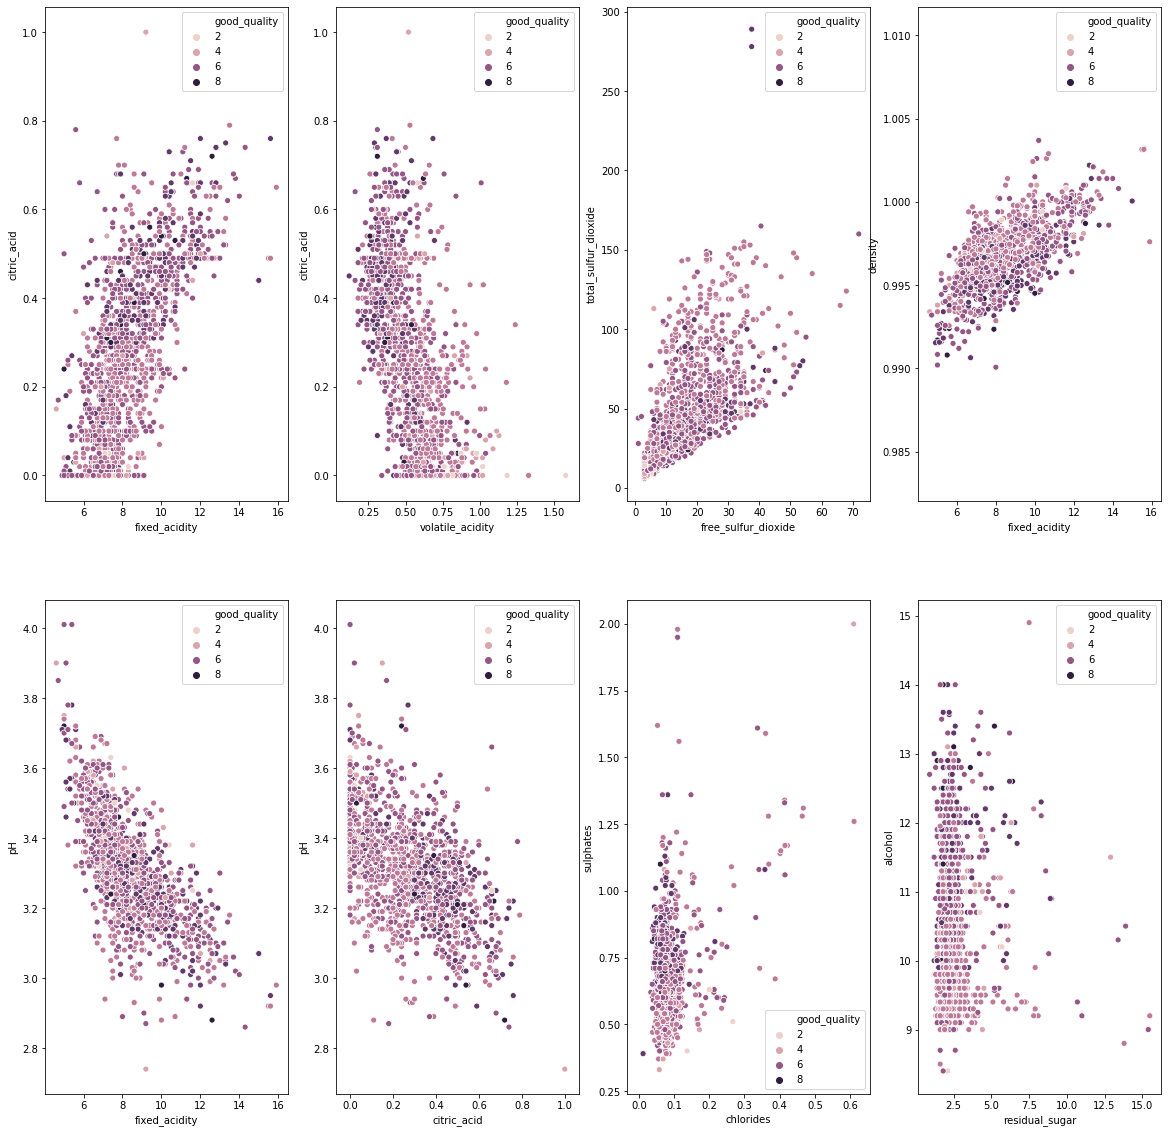

In [116]:
# Scatter plot  finding the relation the weater they are possitive or negative
fig, ax = plt.subplots(2,4,figsize=(20,20))
sns.scatterplot(x = 'fixed_acidity', y = 'citric_acid', hue = 'good_quality', data = df, ax=ax[0,0])
sns.scatterplot(x = 'volatile_acidity', y = 'citric_acid', hue = 'good_quality', data = df, ax=ax[0,1])
sns.scatterplot(x = 'free_sulfur_dioxide', y = 'total_sulfur_dioxide', hue = 'good_quality', data = df, ax=ax[0,2])
sns.scatterplot(x = 'fixed_acidity', y = 'density', hue = 'good_quality', data = df, ax=ax[0,3])
sns.scatterplot(x = 'fixed_acidity', y = 'pH', hue = 'good_quality', data = df, ax=ax[1,0])
sns.scatterplot(x = 'citric_acid', y = 'pH', hue = 'good_quality', data = df, ax=ax[1,1])
sns.scatterplot(x = 'chlorides', y = 'sulphates', hue = 'good_quality', data = df, ax=ax[1,2])
sns.scatterplot(x = 'residual_sugar', y = 'alcohol', hue = 'good_quality', data = df, ax=ax[1,3])


## Model Evaluation

In [117]:
# Train test Split
X=df.drop("good_quality",axis=1)
y=df["good_quality"]

In [118]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [119]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: good_quality, dtype: int64

In [120]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

<IPython.core.display.Javascript object>

In [121]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [122]:
X_train

array([[ 1.69536131e-01, -1.72107140e+00,  4.59303345e-01, ...,
         1.01180685e+00,  1.22661179e+00,  5.50057013e-01],
       [ 2.44606730e+00, -4.01957443e-01,  1.84105501e+00, ...,
        -2.10687612e+00,  1.22661179e+00, -2.05174641e-01],
       [-6.47680186e-01,  3.77472102e-02, -1.28054303e-03, ...,
         4.92026353e-01,  2.97270776e-01,  5.50057013e-01],
       ...,
       [-6.47680186e-01,  4.77451864e-01, -1.07597628e+00, ...,
         1.27169710e+00, -6.90154049e-01, -8.66002338e-01],
       [-2.39072027e-01, -1.83099757e+00,  4.08127357e-01, ...,
         3.72184202e-02,  8.20025095e-01,  1.39969262e+00],
       [-1.46489650e+00, -1.33632983e+00, -5.24565306e-02, ...,
         4.92026353e-01, -6.90154049e-01,  2.91015593e+00]])

In [123]:
X_test

array([[-0.35581722,  0.14767337, -0.97362431, ..., -0.48256207,
         0.00685171, -0.77159838],
       [-0.29744462, -0.18210512, -0.51304042, ...,  0.49202635,
        -1.03865693, -0.86600234],
       [ 1.39536061,  0.75226727, -0.25716048, ..., -0.22267183,
         1.86553373, -0.48838651],
       ...,
       [-0.93954316, -0.40195744, -0.15480851, ...,  0.49202635,
        -0.34165117,  0.17244119],
       [ 1.27861542, -0.12714203,  1.892231  , ..., -1.4571505 ,
         0.00685171,  1.30528867],
       [ 0.92837985, -0.18210512, -0.15480851, ...,  0.16716354,
        -0.80632167, -0.39398255]])

In [124]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def model_evaluate(model_name, y_test, y_pred):
    # Model Evaluation function
    print(f"---------------{model_name}----------------")
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))

## logistic Regression


In [125]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()
LogReg.fit(X_train,y_train)
LogReg.score(X_train,y_train)

0.6228775692582663

In [126]:
y_pred_LogReg=LogReg.predict(X_test)

In [127]:
model_evaluate("Logistic Regression:",y_test,y_pred_LogReg)

---------------Logistic Regression:----------------
Confusion matrix:
 [[  0   0   1   0   0   0]
 [  0   0  11   6   0   0]
 [  0   0 146  49   0   0]
 [  0   0  73 109  18   0]
 [  0   0   4  41  16   0]
 [  0   0   0   2   4   0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.62      0.75      0.68       195
           6       0.53      0.55      0.54       200
           7       0.42      0.26      0.32        61
           8       0.00      0.00      0.00         6

    accuracy                           0.56       480
   macro avg       0.26      0.26      0.26       480
weighted avg       0.53      0.56      0.54       480

Accuracy Score: 0.5645833333333333


C:\Users\raman\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raman\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raman\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [128]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_train,y_train=smote.fit_resample(X_train,y_train)

In [129]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()
LogReg.fit(X_train,y_train)
LogReg.score(X_train,y_train)

0.6183127572016461

In [130]:
y_pred_LogReg=LogReg.predict(X_test)

In [131]:
model_evaluate("Logistic Regression:",y_test,y_pred_LogReg)

---------------Logistic Regression:----------------
Confusion matrix:
 [[ 0  1  0  0  0  0]
 [ 3 11  0  3  0  0]
 [12 46 91 33  6  7]
 [ 4 26 43 67 34 26]
 [ 0  2  3 11 27 18]
 [ 0  0  0  0  3  3]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.13      0.65      0.21        17
           5       0.66      0.47      0.55       195
           6       0.59      0.34      0.43       200
           7       0.39      0.44      0.41        61
           8       0.06      0.50      0.10         6

    accuracy                           0.41       480
   macro avg       0.30      0.40      0.28       480
weighted avg       0.57      0.41      0.46       480

Accuracy Score: 0.41458333333333336


## Decision Tree Classifier

In [132]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=42)

In [133]:
dtc.fit(X_train,y_train)
dtc.score(X_train,y_train)

1.0

In [134]:
y_pred_dtc=dtc.predict(X_test)

In [135]:
model_evaluate(" Decision Tree Classifier:",y_test,y_pred_dtc)

--------------- Decision Tree Classifier:----------------
Confusion matrix:
 [[  0   0   0   1   0   0]
 [  2   5   5   2   3   0]
 [  6  10 125  47   6   1]
 [  3   6  42 115  33   1]
 [  0   4   5  15  34   3]
 [  0   0   0   1   3   2]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.20      0.29      0.24        17
           5       0.71      0.64      0.67       195
           6       0.64      0.57      0.60       200
           7       0.43      0.56      0.49        61
           8       0.29      0.33      0.31         6

    accuracy                           0.59       480
   macro avg       0.38      0.40      0.38       480
weighted avg       0.62      0.59      0.60       480

Accuracy Score: 0.5854166666666667


## Random Forest Classifier

In [136]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=42)

In [137]:
rfc.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [138]:
rfc.score(X_test,y_test)

0.6354166666666666

In [139]:
y_pred_rfc=rfc.predict(X_test)

In [140]:
model_evaluate("random Forest Classifier:",y_test,y_pred_rfc)

---------------random Forest Classifier:----------------
Confusion matrix:
 [[  0   1   0   0   0   0]
 [  0   6   6   5   0   0]
 [  4  13 133  40   5   0]
 [  1   7  39 126  22   5]
 [  0   2   0  20  38   1]
 [  0   0   0   0   4   2]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.21      0.35      0.26        17
           5       0.75      0.68      0.71       195
           6       0.66      0.63      0.64       200
           7       0.55      0.62      0.58        61
           8       0.25      0.33      0.29         6

    accuracy                           0.64       480
   macro avg       0.40      0.44      0.41       480
weighted avg       0.66      0.64      0.65       480

Accuracy Score: 0.6354166666666666


## Support Vector Classifier

In [141]:
from sklearn.svm import SVC
svc=SVC(random_state=42)

In [142]:
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)

In [143]:
model_evaluate("Support Vactor Machine:",y_test,y_pred_svc)

---------------Support Vactor Machine:----------------
Confusion matrix:
 [[  0   1   0   0   0   0]
 [  0  10   5   2   0   0]
 [  4  31 118  36   3   3]
 [  2  15  51  78  35  19]
 [  0   4   0  18  27  12]
 [  0   0   0   0   3   3]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.16      0.59      0.26        17
           5       0.68      0.61      0.64       195
           6       0.58      0.39      0.47       200
           7       0.40      0.44      0.42        61
           8       0.08      0.50      0.14         6

    accuracy                           0.49       480
   macro avg       0.32      0.42      0.32       480
weighted avg       0.58      0.49      0.52       480

Accuracy Score: 0.49166666666666664


## Bagging Classifier

In [144]:
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier(random_state=42)

In [145]:
bc.fit(X_train,y_train)

BaggingClassifier(random_state=42)

In [146]:
y_pred_bc=bc.predict(X_test)
model_evaluate("Bagging Classifier:",y_test,y_pred_bc)

---------------Bagging Classifier:----------------
Confusion matrix:
 [[  0   0   0   1   0   0]
 [  1   7   6   3   0   0]
 [  5  15 133  37   5   0]
 [  3  10  43 113  26   5]
 [  0   1   5  15  36   4]
 [  0   0   0   1   3   2]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.21      0.41      0.28        17
           5       0.71      0.68      0.70       195
           6       0.66      0.56      0.61       200
           7       0.51      0.59      0.55        61
           8       0.18      0.33      0.24         6

    accuracy                           0.61       480
   macro avg       0.38      0.43      0.40       480
weighted avg       0.64      0.61      0.62       480

Accuracy Score: 0.60625


## AdaBoost Classifier

In [147]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(random_state=42)

In [148]:
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [149]:
y_pred_abc=abc.predict(X_test)
model_evaluate("AdaBoost Classifier:",y_test,y_pred_abc)

---------------AdaBoost Classifier:----------------
Confusion matrix:
 [[  1   0   0   0   0   0]
 [ 11   0   0   0   6   0]
 [158   0   0  17  16   4]
 [107   0   0  27  43  23]
 [  9   0   0  14  18  20]
 [  0   0   0   1   4   1]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      1.00      0.01         1
           4       0.00      0.00      0.00        17
           5       0.00      0.00      0.00       195
           6       0.46      0.14      0.21       200
           7       0.21      0.30      0.24        61
           8       0.02      0.17      0.04         6

    accuracy                           0.10       480
   macro avg       0.11      0.27      0.08       480
weighted avg       0.22      0.10      0.12       480

Accuracy Score: 0.09791666666666667


C:\Users\raman\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raman\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raman\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gredient Boosting Classifier

In [150]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=42)

In [151]:
gbc.fit(X_train,y_train)


GradientBoostingClassifier(random_state=42)

In [152]:
y_pred_gbc=gbc.predict(X_test)

In [153]:
model_evaluate("Gredient Boosting Classifier:",y_test,y_pred_gbc)

---------------Gredient Boosting Classifier:----------------
Confusion matrix:
 [[  0   0   0   1   0   0]
 [  0   3   9   5   0   0]
 [  4  18 124  44   5   0]
 [  1  11  38 108  35   7]
 [  0   1   2  22  33   3]
 [  0   0   0   0   4   2]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.09      0.18      0.12        17
           5       0.72      0.64      0.67       195
           6       0.60      0.54      0.57       200
           7       0.43      0.54      0.48        61
           8       0.17      0.33      0.22         6

    accuracy                           0.56       480
   macro avg       0.33      0.37      0.34       480
weighted avg       0.60      0.56      0.58       480

Accuracy Score: 0.5625


In [154]:
model_evaluate("Logistic Regression:",y_test,y_pred_LogReg)
model_evaluate(" Decision Tree Classifier:",y_test,y_pred_dtc)
model_evaluate("random Forest Classifier:",y_test,y_pred_rfc)
model_evaluate("Support Vactor Machine:",y_test,y_pred_svc)
model_evaluate("Bagging Classifier:",y_test,y_pred_bc)
model_evaluate("AdaBoost Classifier:",y_test,y_pred_abc)
model_evaluate("Gredient Boosting Classifier:",y_test,y_pred_gbc)

---------------Logistic Regression:----------------
Confusion matrix:
 [[ 0  1  0  0  0  0]
 [ 3 11  0  3  0  0]
 [12 46 91 33  6  7]
 [ 4 26 43 67 34 26]
 [ 0  2  3 11 27 18]
 [ 0  0  0  0  3  3]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.13      0.65      0.21        17
           5       0.66      0.47      0.55       195
           6       0.59      0.34      0.43       200
           7       0.39      0.44      0.41        61
           8       0.06      0.50      0.10         6

    accuracy                           0.41       480
   macro avg       0.30      0.40      0.28       480
weighted avg       0.57      0.41      0.46       480

Accuracy Score: 0.41458333333333336
--------------- Decision Tree Classifier:----------------
Confusion matrix:
 [[  0   0   0   1   0   0]
 [  2   5   5   2   3   0]
 [  6  10 125  47   6   1]
 [  3   6  42 115  33   1]
 [  0   4   5 

C:\Users\raman\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raman\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\raman\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 so all the model comparing above ti can conclude that random forest prforming good in my dataset i can use the for deployment

## Predicting on new data

In [165]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'good_quality'],
      dtype='object')

In [155]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [156]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: good_quality, dtype: int64

In [157]:
input_data=(7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9987,3.51,0.56,9.4)
input_data_as_numpy_array=np.array(input_data)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshape)
print(std_data)
prediction=rfc.predict(std_data)
print("Predicted Class:",prediction)

[[-0.530935    0.91715652 -1.38303221 -0.45428181 -0.24853325 -0.47917698
  -0.39266296  1.04487112  1.2716971  -0.57398642 -0.96040629]]
Predicted Class: [5]


C:\Users\raman\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


## Pickling the model file for deployment

In [167]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Assuming you have a trained RandomForestClassifier model named 'rfc'
with open("random_forest.sav", "wb") as model_file:
    pickle.dump(rfc, model_file)


In [168]:
import joblib

# Assuming you have a trained RandomForestClassifier model named 'rfc'
joblib.dump(rfc, "random_forest.pkl")


['random_forest.pkl']

In [169]:
import joblib

# Load the saved model
loaded_model = joblib.load("random_forest.pkl")


In [170]:
input_data=(7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9987,3.51,0.56,9.4)
input_data_as_numpy_array=np.array(input_data)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

#save the scaler object to a .pkl file
with open("scaler_object.pkl","wb") as scaler_file:
    pickle.dump(scaler,scaler_file)

std_data=scaler.transform(input_data_reshape)
print(std_data)
prediction=rfc.predict(std_data)
print("Predicted Class:",prediction)

[[-0.530935    0.91715652 -1.38303221 -0.45428181 -0.24853325 -0.47917698
  -0.39266296  1.04487112  1.2716971  -0.57398642 -0.96040629]]
Predicted Class: [5]


C:\Users\raman\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [166]:
import sklearn
print(sklearn.__version__)

1.0.2
